# Load the data from RosBag


In [23]:
import pandas as pd
import numpy as np
from scipy.spatial.transform import Rotation as Rot
# Replace with the actual path to your CSV
csv_file = "model_states.csv"

# Read the CSV into a pandas DataFrame
model_state = pd.read_csv(csv_file)

print(model_state.columns)

model_state



Index(['%time', 'field.name0', 'field.name1', 'field.name2', 'field.name3',
       'field.pose0.position.x', 'field.pose0.position.y',
       'field.pose0.position.z', 'field.pose0.orientation.x',
       'field.pose0.orientation.y', 'field.pose0.orientation.z',
       'field.pose0.orientation.w', 'field.pose1.position.x',
       'field.pose1.position.y', 'field.pose1.position.z',
       'field.pose1.orientation.x', 'field.pose1.orientation.y',
       'field.pose1.orientation.z', 'field.pose1.orientation.w',
       'field.pose2.position.x', 'field.pose2.position.y',
       'field.pose2.position.z', 'field.pose2.orientation.x',
       'field.pose2.orientation.y', 'field.pose2.orientation.z',
       'field.pose2.orientation.w', 'field.pose3.position.x',
       'field.pose3.position.y', 'field.pose3.position.z',
       'field.pose3.orientation.x', 'field.pose3.orientation.y',
       'field.pose3.orientation.z', 'field.pose3.orientation.w',
       'field.twist0.linear.x', 'field.twist0.line

,%time,field.name0,field.name1,field.name2,field.name3,field.pose0.position.x,field.pose0.position.y,field.pose0.position.z,field.pose0.orientation.x,field.pose0.orientation.y,...,field.twist2.linear.z,field.twist2.angular.x,field.twist2.angular.y,field.twist2.angular.z,field.twist3.linear.x,field.twist3.linear.y,field.twist3.linear.z,field.twist3.angular.x,field.twist3.angular.y,field.twist3.angular.z
0,14009000000,ocean_waves,vessel,120m_landscape_smooth_tri,quadrotor,0,0,0,0,0,...,0,0,0,0,0.312384,-0.320109,0.041819,-0.450783,-0.042231,0.005638
1,14009000000,ocean_waves,vessel,120m_landscape_smooth_tri,quadrotor,0,0,0,0,0,...,0,0,0,0,0.312283,-0.322007,0.041940,-0.450642,-0.043740,0.005333
2,14009000000,ocean_waves,vessel,120m_landscape_smooth_tri,quadrotor,0,0,0,0,0,...,0,0,0,0,0.312182,-0.323900,0.042061,-0.450501,-0.045246,0.005029
3,14009000000,ocean_waves,vessel,120m_landscape_smooth_tri,quadrotor,0,0,0,0,0,...,0,0,0,0,0.312080,-0.325788,0.042184,-0.450361,-0.046748,0.004728
4,14009000000,ocean_waves,vessel,120m_landscape_smooth_tri,quadrotor,0,0,0,0,0,...,0,0,0,0,0.311978,-0.327672,0.042308,-0.450221,-0.048247,0.004428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73344,87348000000,ocean_waves,vessel,120m_landscape_smooth_tri,quadrotor,0,0,0,0,0,...,0,0,0,0,0.707793,0.575176,0.000601,0.015748,-0.032976,-0.000243
73345,87349000000,ocean_waves,vessel,120m_landscape_smooth_tri,quadrotor,0,0,0,0,0,...,0,0,0,0,0.707667,0.575211,0.000599,0.011504,-0.028567,-0.000310
73346,87350000000,ocean_waves,vessel,120m_landscape_smooth_tri,quadrotor,0,0,0,0,0,...,0,0,0,0,0.707541,0.575246,0.000596,0.007261,-0.024159,-0.000378
73347,87351000000,ocean_waves,vessel,120m_landscape_smooth_tri,quadrotor,0,0,0,0,0,...,0,0,0,0,0.707414,0.575281,0.000595,0.011908,-0.028959,-0.000304


In [24]:
ground_truth = pd.read_csv("ground_truth.csv")

# See the first few rows
print(ground_truth.columns)

ground_truth

Index(['%time', 'field.header.seq', 'field.header.stamp',
       'field.header.frame_id', 'field.child_frame_id',
       'field.pose.pose.position.x', 'field.pose.pose.position.y',
       'field.pose.pose.position.z', 'field.pose.pose.orientation.x',
       'field.pose.pose.orientation.y', 'field.pose.pose.orientation.z',
       'field.pose.pose.orientation.w', 'field.pose.covariance0',
       'field.pose.covariance1', 'field.pose.covariance2',
       'field.pose.covariance3', 'field.pose.covariance4',
       'field.pose.covariance5', 'field.pose.covariance6',
       'field.pose.covariance7', 'field.pose.covariance8',
       'field.pose.covariance9', 'field.pose.covariance10',
       'field.pose.covariance11', 'field.pose.covariance12',
       'field.pose.covariance13', 'field.pose.covariance14',
       'field.pose.covariance15', 'field.pose.covariance16',
       'field.pose.covariance17', 'field.pose.covariance18',
       'field.pose.covariance19', 'field.pose.covariance20',
       'f

,%time,field.header.seq,field.header.stamp,field.header.frame_id,field.child_frame_id,field.pose.pose.position.x,field.pose.pose.position.y,field.pose.pose.position.z,field.pose.pose.orientation.x,field.pose.pose.orientation.y,...,field.twist.covariance26,field.twist.covariance27,field.twist.covariance28,field.twist.covariance29,field.twist.covariance30,field.twist.covariance31,field.twist.covariance32,field.twist.covariance33,field.twist.covariance34,field.twist.covariance35
0,14012000000,1400,14011000000,world,base_link,-2.652655,-4.780032,11.874030,0.093371,-0.004297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14022000000,1401,14021000000,world,base_link,-2.649544,-4.783467,11.874463,0.091112,-0.004513,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14031000000,1402,14031000000,world,base_link,-2.646444,-4.787083,11.874909,0.088849,-0.004749,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14041000000,1403,14041000000,world,base_link,-2.643355,-4.790877,11.875366,0.086569,-0.004963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14051000000,1404,14051000000,world,base_link,-2.640278,-4.794842,11.875836,0.084286,-0.005194,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7327,87290000000,8727,87281000000,world,base_link,-0.130365,-22.176993,12.000504,-0.004775,-0.002347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7328,87328000000,8728,87291000000,world,base_link,-0.123218,-22.171268,12.000511,-0.004678,-0.002531,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7329,87328000000,8729,87301000000,world,base_link,-0.116081,-22.165538,12.000518,-0.004521,-0.002779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7330,87328000000,8730,87311000000,world,base_link,-0.108954,-22.159803,12.000524,-0.004441,-0.002945,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Clean the Data

In [25]:
# Create the subset DataFrame from your model_state DataFrame
subset_columns_state_space = [
    '%time',                  # Timestamp column
    'field.name1',            # Name for the model at index 1 (vessel)
    'field.name3',            # Name for the model at index 3 (drone)
    # Pose data for model 1 (vessel):
    'field.pose1.position.x',
    'field.pose1.position.y',
    'field.pose1.position.z',
    'field.pose1.orientation.x',
    'field.pose1.orientation.y',
    'field.pose1.orientation.z',

    # Pose data for model 3 (drone):
    'field.pose3.position.x',
    'field.pose3.position.y',
    'field.pose3.position.z',
    'field.pose3.orientation.x',
    'field.pose3.orientation.y',
    'field.pose3.orientation.z',

]

vessel_drone = model_state[subset_columns_state_space]

# Rename the columns for clarity:
vessel_drone.rename(columns={
    '%time': 'time',
    'field.name1': 'vessel_name',
    'field.name3': 'drone_name',
    'field.pose1.position.x': 'vessel_pos_x',
    'field.pose1.position.y': 'vessel_pos_y',
    'field.pose1.position.z': 'vessel_pos_z',
    'field.pose1.orientation.x': 'vessel_ori_x',
    'field.pose1.orientation.y': 'vessel_ori_y',
    'field.pose1.orientation.z': 'vessel_ori_z',
    'field.pose3.position.x': 'drone_pos_x',
    'field.pose3.position.y': 'drone_pos_y',
    'field.pose3.position.z': 'drone_pos_z',
    'field.pose3.orientation.x': 'drone_ori_x',
    'field.pose3.orientation.y': 'drone_ori_y',
    'field.pose3.orientation.z': 'drone_ori_z',

}, inplace=True)

# Display the renamed DataFrame
vessel_drone



C:\Users\Zephyrus GA401\AppData\Local\Temp\ipykernel_20684\1079335696.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vessel_drone.rename(columns={


,time,vessel_name,drone_name,vessel_pos_x,vessel_pos_y,vessel_pos_z,vessel_ori_x,vessel_ori_y,vessel_ori_z,drone_pos_x,drone_pos_y,drone_pos_z,drone_ori_x,drone_ori_y,drone_ori_z
0,14009000000,vessel,quadrotor,-2.550664,-5.272131,2.159016,-0.016152,-0.018357,-0.033576,-2.654839,-4.777739,11.873734,0.094939,-0.004127,-0.003356
1,14009000000,vessel,quadrotor,-2.550484,-5.272079,2.160047,-0.016137,-0.018316,-0.033574,-2.654526,-4.778061,11.873776,0.094715,-0.004149,-0.003351
2,14009000000,vessel,quadrotor,-2.550304,-5.272027,2.161079,-0.016122,-0.018274,-0.033572,-2.654214,-4.778385,11.873818,0.094491,-0.004172,-0.003345
3,14009000000,vessel,quadrotor,-2.550124,-5.271975,2.162112,-0.016107,-0.018233,-0.033570,-2.653902,-4.778710,11.873860,0.094267,-0.004196,-0.003340
4,14009000000,vessel,quadrotor,-2.549945,-5.271923,2.163146,-0.016092,-0.018191,-0.033568,-2.653590,-4.779038,11.873902,0.094043,-0.004220,-0.003334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73344,87348000000,vessel,quadrotor,0.229913,-21.875387,2.753341,-0.010901,0.000716,0.082355,-0.082686,-22.138547,12.000548,-0.003957,-0.003757,0.000124
73345,87349000000,vessel,quadrotor,0.230477,-21.874834,2.753278,-0.010893,0.000697,0.082362,-0.081978,-22.137972,12.000548,-0.003951,-0.003771,0.000124
73346,87350000000,vessel,quadrotor,0.231042,-21.874281,2.753214,-0.010885,0.000679,0.082369,-0.081270,-22.137396,12.000549,-0.003947,-0.003783,0.000124
73347,87351000000,vessel,quadrotor,0.231606,-21.873729,2.753150,-0.010876,0.000661,0.082375,-0.080563,-22.136821,12.000550,-0.003941,-0.003797,0.000123


In [26]:
subset_columns_drone_marker = [
    # Position of drone to the Marker:
    'field.pose.pose.position.x', 
    'field.pose.pose.position.y',
    'field.pose.pose.position.z',
    # Orientation of drone to the Marker:
    'field.pose.pose.orientation.x',
    'field.pose.pose.orientation.y', 
    'field.pose.pose.orientation.z',
    'field.pose.pose.orientation.w',
]

drone_marker = ground_truth[subset_columns_drone_marker]

# Rename the columns to something more meaningful:
drone_marker.rename(columns={
    'field.pose.pose.position.x': 'drone_marker_pos_x',
    'field.pose.pose.position.y': 'drone_marker_pos_y',
    'field.pose.pose.position.z': 'drone_marker_pos_z',
    'field.pose.pose.orientation.x': 'drone_marker_ori_x',
    'field.pose.pose.orientation.y': 'drone_marker_ori_y',
    'field.pose.pose.orientation.z': 'drone_marker_ori_z',
    'field.pose.pose.orientation.w': 'drone_marker_ori_w'
}, inplace=True)

drone_marker


C:\Users\Zephyrus GA401\AppData\Local\Temp\ipykernel_20684\3158438831.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drone_marker.rename(columns={


,drone_marker_pos_x,drone_marker_pos_y,drone_marker_pos_z,drone_marker_ori_x,drone_marker_ori_y,drone_marker_ori_z,drone_marker_ori_w
0,-2.652655,-4.780032,11.874030,0.093371,-0.004297,-0.003318,0.995617
1,-2.649544,-4.783467,11.874463,0.091112,-0.004513,-0.003262,0.995825
2,-2.646444,-4.787083,11.874909,0.088849,-0.004749,-0.003208,0.996029
3,-2.643355,-4.790877,11.875366,0.086569,-0.004963,-0.003153,0.996228
4,-2.640278,-4.794842,11.875836,0.084286,-0.005194,-0.003101,0.996423
...,...,...,...,...,...,...,...
7327,-0.130365,-22.176993,12.000504,-0.004775,-0.002347,0.000136,0.999986
7328,-0.123218,-22.171268,12.000511,-0.004678,-0.002531,0.000134,0.999986
7329,-0.116081,-22.165538,12.000518,-0.004521,-0.002779,0.000133,0.999986
7330,-0.108954,-22.159803,12.000524,-0.004441,-0.002945,0.000131,0.999986


In [27]:

#Replicate each row exactly 10 times:
rep_factor = round(len(vessel_drone)/len(drone_marker))
drone_marker_scaled = drone_marker.loc[
    np.repeat(drone_marker.index, rep_factor)
].reset_index(drop=True)

drone_marker_scaled

,drone_marker_pos_x,drone_marker_pos_y,drone_marker_pos_z,drone_marker_ori_x,drone_marker_ori_y,drone_marker_ori_z,drone_marker_ori_w
0,-2.652655,-4.780032,11.874030,0.093371,-0.004297,-0.003318,0.995617
1,-2.652655,-4.780032,11.874030,0.093371,-0.004297,-0.003318,0.995617
2,-2.652655,-4.780032,11.874030,0.093371,-0.004297,-0.003318,0.995617
3,-2.652655,-4.780032,11.874030,0.093371,-0.004297,-0.003318,0.995617
4,-2.652655,-4.780032,11.874030,0.093371,-0.004297,-0.003318,0.995617
...,...,...,...,...,...,...,...
73315,-0.101839,-22.154063,12.000531,-0.004308,-0.003167,0.000129,0.999986
73316,-0.101839,-22.154063,12.000531,-0.004308,-0.003167,0.000129,0.999986
73317,-0.101839,-22.154063,12.000531,-0.004308,-0.003167,0.000129,0.999986
73318,-0.101839,-22.154063,12.000531,-0.004308,-0.003167,0.000129,0.999986


In [28]:

# Assume vessel_drone (state_space) is high-frequency DataFrame
# and drone_marker is your low-frequency DataFrame
# For example:
# vessel_drone.shape -> (73349, ...) 
# drone_marker.shape -> (7332, ...)

desired_length = len(drone_marker_scaled)  # e.g., 7332 rows

# Generate uniformly spaced indices between 0 and len(vessel_drone)-1
indices = np.linspace(0, len(vessel_drone) - 1, desired_length, dtype=int)

# Select the rows at those indices to form the downsampled DataFrame
vessel_drone_scaled = vessel_drone.iloc[indices].reset_index(drop=True)


# Assuming vessel_drone and drone_marker have the same number of rows
clean_data_setup = pd.concat([vessel_drone_scaled, drone_marker_scaled], axis=1)

clean_data_setup.columns




Index(['time', 'vessel_name', 'drone_name', 'vessel_pos_x', 'vessel_pos_y',
       'vessel_pos_z', 'vessel_ori_x', 'vessel_ori_y', 'vessel_ori_z',
       'drone_pos_x', 'drone_pos_y', 'drone_pos_z', 'drone_ori_x',
       'drone_ori_y', 'drone_ori_z', 'drone_marker_pos_x',
       'drone_marker_pos_y', 'drone_marker_pos_z', 'drone_marker_ori_x',
       'drone_marker_ori_y', 'drone_marker_ori_z', 'drone_marker_ori_w'],
      dtype='object')

# Validation of physical of Marker fron the many perspectives of views

In [29]:
# import numpy as np
# from math import cos, sin

# def compute_marker_world(row):
#     # 1) Drone's world position (in meters)
#     drone_world = np.array([
#         row['drone_pos_x'],  # e.g., from field.pose3.position.x
#         row['drone_pos_y'],  # e.g., from field.pose3.position.y
#         row['drone_pos_z']   # e.g., from field.pose3.position.z
#     ])
    
#     # 2) Drone-to-marker relative position from the camera (from ArUco pose estimation)
#     P_dm = np.array([
#         row['drone_marker_pos_x'],  # relative x
#         row['drone_marker_pos_y'],  # relative y
#         row['drone_marker_pos_z']   # relative z
#     ])
    
#     # 3) Get the drone's yaw angle in radians (extracted from drone's orientation)
#     yaw = row['drone_ori_x']
    
#     # 4) Correct for the camera mounting: 180° rotation about z
#     # This flips the x and y axes (but leaves z unchanged)
#     R_cam_to_body = np.array([
#         [-1,  0, 0],
#         [ 0, -1, 0],
#         [ 0,  0, 1]
#     ])
#     P_dm_body = R_cam_to_body.dot(P_dm)
    
#     # 5) Rotate from the drone's body frame to the world frame using the drone's yaw.
#     R_body_to_world = np.array([
#         [ cos(yaw), -sin(yaw), 0],
#         [ sin(yaw),  cos(yaw), 0],
#         [       0,        0, 1]
#     ])
#     P_dm_world = R_body_to_world.dot(P_dm_body)
    
#     # 6) Apply DCM altitude correction to flip the z-axis:
#     dcm_alt = np.diag([1, 1, -1])
#     P_dm_world_corrected = dcm_alt.dot(P_dm_world)
    
#     # 7) Compute the final marker world position by adding the drone's world position.
#     marker_world = drone_world + P_dm_world_corrected
#     return marker_world

# # Example: If you have a merged DataFrame 'df_merged' with the following columns:
# # - 'drone_pos_x', 'drone_pos_y', 'drone_pos_z'
# # - 'drone_marker_pos_x', 'drone_marker_pos_y', 'drone_marker_pos_z'
# # - 'drone_ori_x' (which holds the yaw in radians)
# #
# # Then, you can apply the function as follows:

# clean_data_setup[['marker_world_x', 'marker_world_y', 'marker_world_z']] = clean_data_setup.apply(
#     lambda row: pd.Series(compute_marker_world(row)), axis=1)

# print(clean_data_setup[['drone_pos_x', 'drone_pos_y', 'drone_pos_z',
#                  'marker_world_x', 'marker_world_y', 'marker_world_z']].head())


In [30]:
def compute_marker_from_ship(row, offset=np.array([0, 2.5, 5.02])):
    # Vessel's world coordinate from simulation
    vessel_pos = np.array([row['vessel_pos_x'], row['vessel_pos_y'], row['vessel_pos_z']])
    # Marker world coordinate (ship's view) is vessel position plus the fixed offset.
    return vessel_pos + offset


In [31]:
import numpy as np
from math import cos, sin

def compute_marker_world(row):
    # 1) Drone's world position (in meters)
    # These should come from your ROS bag (e.g., vessel_drone DataFrame with renamed columns)
    drone_world = np.array([
        row['drone_pos_x'],  # e.g., from field.pose3.position.x
        row['drone_pos_y'],  # e.g., from field.pose3.position.y
        row['drone_pos_z']   # e.g., from field.pose3.position.z
    ])
    
    # 2) Drone-to-marker relative position from the camera (from ArUco pose estimation)
    # These should come from your drone_marker DataFrame (renamed columns)
    P_dm = np.array([
        row['drone_marker_pos_x'],  # relative x
        row['drone_marker_pos_y'],  # relative y
        row['drone_marker_pos_z']   # relative z
    ])
    
    # 3) Get the drone's yaw angle in radians (extracted from drone's orientation)
    # You must compute or have this value. For example, if your drone orientation is given as a quaternion,
    # you can compute yaw, or it might already be provided as 'drone_yaw'.
    yaw = row['drone_ori_x']
    
    # 4) Correct for the camera mounting: 180° rotation about z
    # This flips the x and y axes (but leaves z unchanged)
    R_cam_to_body = np.array([
        [-1,  0, 0],
        [ 0, -1, 0],
        [ 0,  0, 1]
    ])
    P_dm_body = R_cam_to_body.dot(P_dm)
    
    # 5) Rotate from the drone's body frame to the world frame using the drone's yaw.
    R_body_to_world = np.array([
        [ cos(yaw), -sin(yaw), 0],
        [ sin(yaw),  cos(yaw), 0],
        [       0,        0, 1]
    ])
    P_dm_world = R_body_to_world.dot(P_dm_body)
    
    # 6) Compute the final marker world position by adding the drone's world position.
    marker_world = drone_world + P_dm_world
    return marker_world

# Example: If you have a merged DataFrame 'df_merged' with the following columns:
# - 'drone_pos_x', 'drone_pos_y', 'drone_pos_z'
# - 'drone_marker_pos_x', 'drone_marker_pos_y', 'drone_marker_pos_z'
# - 'drone_yaw'
# Then, you can apply the function as follows:

clean_data_setup[['marker_world_x', 'marker_world_y', 'marker_world_z']] = clean_data_setup .apply(
    lambda row: pd.Series(compute_marker_world(row)), axis=1)



In [32]:

# Fixed marker coordinate (ground truth)
fixed_marker = np.array([0, 2.5, 5.02])

# Define tolerance thresholds for each coordinate (in meters)
threshold_x = 3  # allowable difference in x
threshold_y = 3 # allowable difference in y
threshold_z = 100   # allowable difference in z

# Assuming your DataFrame 'clean_data_setup' has these columns:
# 'marker_world_x', 'marker_world_y', 'marker_world_z'
filtered_df = clean_data_setup[
    (np.abs(clean_data_setup['marker_world_x'] - fixed_marker[0]) < threshold_x) &
    (np.abs(clean_data_setup['marker_world_y'] - fixed_marker[1]) < threshold_y) &
    (np.abs(clean_data_setup['marker_world_z'] - fixed_marker[2]) < threshold_z)
]


filtered_df

,time,vessel_name,drone_name,vessel_pos_x,vessel_pos_y,vessel_pos_z,vessel_ori_x,vessel_ori_y,vessel_ori_z,drone_pos_x,...,drone_marker_pos_x,drone_marker_pos_y,drone_marker_pos_z,drone_marker_ori_x,drone_marker_ori_y,drone_marker_ori_z,drone_marker_ori_w,marker_world_x,marker_world_y,marker_world_z
0,14009000000,vessel,quadrotor,-2.550664,-5.272131,2.159016,-0.016152,-0.018357,-0.033576,-2.654839,...,-2.652655,-4.780032,11.874030,0.093371,-0.004297,-0.003318,0.995617,-0.467260,0.232230,23.747763
1,14009000000,vessel,quadrotor,-2.550484,-5.272079,2.160047,-0.016137,-0.018316,-0.033574,-2.654526,...,-2.652655,-4.780032,11.874030,0.093371,-0.004297,-0.003318,0.995617,-0.465825,0.231418,23.747805
2,14009000000,vessel,quadrotor,-2.550304,-5.272027,2.161079,-0.016122,-0.018274,-0.033572,-2.654214,...,-2.652655,-4.780032,11.874030,0.093371,-0.004297,-0.003318,0.995617,-0.464390,0.230603,23.747847
3,14009000000,vessel,quadrotor,-2.550124,-5.271975,2.162112,-0.016107,-0.018233,-0.033570,-2.653902,...,-2.652655,-4.780032,11.874030,0.093371,-0.004297,-0.003318,0.995617,-0.462955,0.229786,23.747890
4,14009000000,vessel,quadrotor,-2.549945,-5.271923,2.163146,-0.016092,-0.018191,-0.033568,-2.653590,...,-2.652655,-4.780032,11.874030,0.093371,-0.004297,-0.003318,0.995617,-0.461522,0.228968,23.747932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73315,87347000000,vessel,quadrotor,0.229347,-21.875939,2.753403,-0.010909,0.000734,0.082349,-0.083393,...,-0.101839,-22.154063,12.000531,-0.004308,-0.003167,0.000129,0.999986,0.106276,0.014364,24.001078
73316,87348000000,vessel,quadrotor,0.229913,-21.875387,2.753341,-0.010901,0.000716,0.082355,-0.082686,...,-0.101839,-22.154063,12.000531,-0.004308,-0.003167,0.000129,0.999986,0.106810,0.014940,24.001079
73317,87349000000,vessel,quadrotor,0.230477,-21.874834,2.753278,-0.010893,0.000697,0.082362,-0.081978,...,-0.101839,-22.154063,12.000531,-0.004308,-0.003167,0.000129,0.999986,0.107390,0.015516,24.001079
73318,87350000000,vessel,quadrotor,0.231042,-21.874281,2.753214,-0.010885,0.000679,0.082369,-0.081270,...,-0.101839,-22.154063,12.000531,-0.004308,-0.003167,0.000129,0.999986,0.108017,0.016092,24.001080


   marker_world_x  marker_world_y  marker_world_z   error_x   error_y  \
0       -0.467260        0.232230       23.747763 -0.467260 -2.267770   
1       -0.465825        0.231418       23.747805 -0.465825 -2.268582   
2       -0.464390        0.230603       23.747847 -0.464390 -2.269397   
3       -0.462955        0.229786       23.747890 -0.462955 -2.270214   
4       -0.461522        0.228968       23.747932 -0.461522 -2.271032   

     error_z  
0  18.727763  
1  18.727805  
2  18.727847  
3  18.727890  
4  18.727932  

Error Statistics:
            error_x       error_y       error_z
count  73320.000000  73320.000000  73320.000000
mean       0.012139     -2.506157     18.967778
std        0.206696      0.033699      0.032565
min       -0.467260     -2.635054     18.727763
25%       -0.119901     -2.527435     18.976316
50%       -0.004788     -2.501470     18.979243
75%        0.132373     -2.490753     18.980296
max        0.635369     -2.267770     18.981116


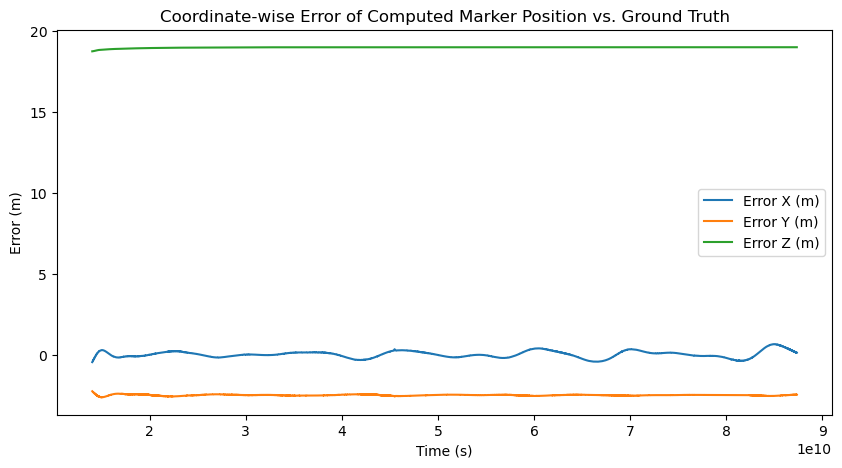

In [33]:

import matplotlib.pyplot as plt

# Fixed (ground-truth) ArUco marker coordinates (in meters)
fixed_marker = np.array([0, 2.5, 5.02])

# Assume your DataFrame (e.g. 'clean_data_setup') already has these columns:
# 'marker_world_x', 'marker_world_y', 'marker_world_z'
# which were computed from your transformation (drone-to-marker from the camera pose estimation)

# Compute coordinate-wise errors
clean_data_setup['error_x'] = clean_data_setup['marker_world_x'] - fixed_marker[0]
clean_data_setup['error_y'] = clean_data_setup['marker_world_y'] - fixed_marker[1]
clean_data_setup['error_z'] = clean_data_setup['marker_world_z'] - fixed_marker[2]

# Print out the first few rows of errors
print(clean_data_setup[['marker_world_x', 'marker_world_y', 'marker_world_z',
                          'error_x', 'error_y', 'error_z']].head())

# Optionally, compute summary statistics for each coordinate error
error_stats = clean_data_setup[['error_x', 'error_y', 'error_z']].describe()
print("\nError Statistics:")
print(error_stats)

# Plot the errors vs. time if you have a 'time' column (in seconds)
if 'time' in clean_data_setup.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(clean_data_setup['time'], clean_data_setup['error_x'], label='Error X (m)')
    plt.plot(clean_data_setup['time'], clean_data_setup['error_y'], label='Error Y (m)')
    plt.plot(clean_data_setup['time'], clean_data_setup['error_z'], label='Error Z (m)')
    plt.xlabel('Time (s)')
    plt.ylabel('Error (m)')
    plt.title('Coordinate-wise Error of Computed Marker Position vs. Ground Truth')
    plt.legend()
    plt.show()

# Note:
# - If your pose estimation is calibrated in meters, then the computed relative position (and hence the final marker coordinates)
#   will be in meters. Check that your object points in solvePnP (or similar) were provided in meters.
# - If you see very large errors (e.g. tens of meters), there might be a unit or calibration issue.
